# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 641


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leningradskiy
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | tagusao
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | abu samrah
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | raudeberg
Processing Record 17 of Set 1 | molokovo
Processing Record 18 of Set 1 | fairbanks
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | bucerias
Processing Record 21 of Set 1 | labutta
City not found. Skipping...
Processing Record 2

Processing Record 36 of Set 4 | codrington
Processing Record 37 of Set 4 | sokoni
Processing Record 38 of Set 4 | lazaro cardenas
Processing Record 39 of Set 4 | morondava
Processing Record 40 of Set 4 | bikaner
Processing Record 41 of Set 4 | nurota
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | rypefjord
Processing Record 44 of Set 4 | rubiera
Processing Record 45 of Set 4 | mlonggo
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | cuamba
Processing Record 49 of Set 4 | qaanaaq
Processing Record 0 of Set 5 | aljezur
Processing Record 1 of Set 5 | akyab
Processing Record 2 of Set 5 | bredasdorp
Processing Record 3 of Set 5 | shingu
Processing Record 4 of Set 5 | mount isa
Processing Record 5 of Set 5 | mahadday weyne
City not found. Skipping...
Processing Record 6 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 5 | bac l

Processing Record 24 of Set 8 | honningsvag
Processing Record 25 of Set 8 | novaya ladoga
Processing Record 26 of Set 8 | valdemarpils
Processing Record 27 of Set 8 | davila
Processing Record 28 of Set 8 | nizwa
Processing Record 29 of Set 8 | fez
Processing Record 30 of Set 8 | petatlan
Processing Record 31 of Set 8 | bannur
Processing Record 32 of Set 8 | ust-kuyga
Processing Record 33 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | iqaluit
Processing Record 36 of Set 8 | erenhot
Processing Record 37 of Set 8 | tazovskiy
Processing Record 38 of Set 8 | matamoros
Processing Record 39 of Set 8 | topolobampo
Processing Record 40 of Set 8 | linchuan
City not found. Skipping...
Processing Record 41 of Set 8 | terny
Processing Record 42 of Set 8 | taltal
Processing Record 43 of Set 8 | baherden
Processing Record 44 of Set 8 | yulara
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | vila franca do campo
Processin

Processing Record 11 of Set 12 | kegayli
City not found. Skipping...
Processing Record 12 of Set 12 | billings
Processing Record 13 of Set 12 | seoul
Processing Record 14 of Set 12 | riviere-au-renard
Processing Record 15 of Set 12 | gangotri
City not found. Skipping...
Processing Record 16 of Set 12 | tessalit
Processing Record 17 of Set 12 | kathu
Processing Record 18 of Set 12 | sancti spiritus
Processing Record 19 of Set 12 | warqla
City not found. Skipping...
Processing Record 20 of Set 12 | amazar
Processing Record 21 of Set 12 | dabakala
Processing Record 22 of Set 12 | panaba
Processing Record 23 of Set 12 | saint pete beach
Processing Record 24 of Set 12 | sawakin
Processing Record 25 of Set 12 | huilong
Processing Record 26 of Set 12 | tattayyangarpettai
Processing Record 27 of Set 12 | sivas
Processing Record 28 of Set 12 | arona
Processing Record 29 of Set 12 | peruibe
Processing Record 30 of Set 12 | khor
Processing Record 31 of Set 12 | comodoro rivadavia
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,leningradskiy,69.3833,178.4167,-23.51,99,97,1.40,RU,1673626490
1,butaritari,3.0707,172.7902,27.11,80,21,6.86,KI,1673626490
2,tagusao,9.1924,117.8141,25.77,82,100,1.52,PH,1673626491
3,albany,42.6001,-73.9662,5.78,94,100,0.89,US,1673626420
4,lagoa,39.0500,-27.9833,16.68,84,100,12.64,PT,1673626491


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leningradskiy,69.3833,178.4167,-23.51,99,97,1.40,RU,1673626490
1,butaritari,3.0707,172.7902,27.11,80,21,6.86,KI,1673626490
2,tagusao,9.1924,117.8141,25.77,82,100,1.52,PH,1673626491
3,albany,42.6001,-73.9662,5.78,94,100,0.89,US,1673626420
4,lagoa,39.0500,-27.9833,16.68,84,100,12.64,PT,1673626491


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

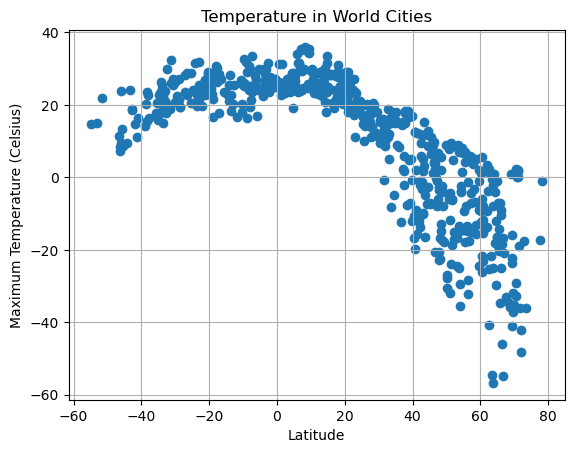

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Maximum Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

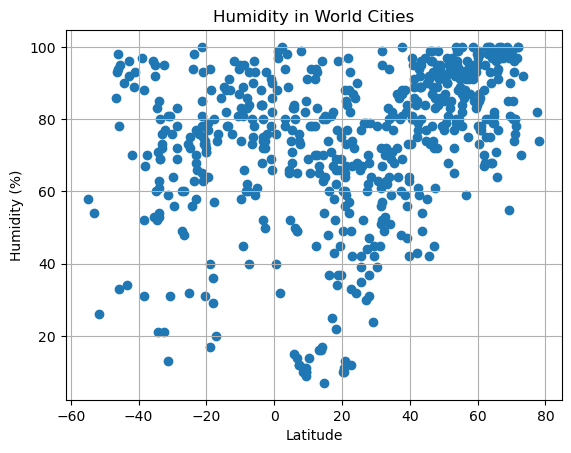

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

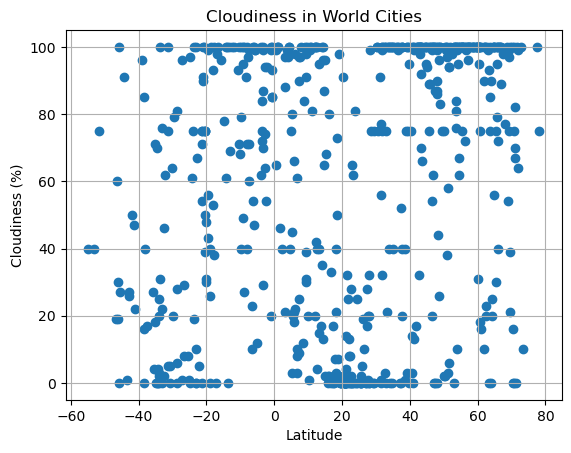

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

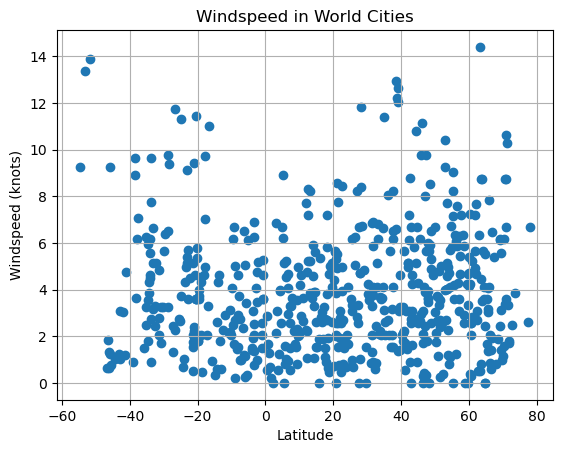

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed in World Cities")
plt.ylabel("Windspeed (knots)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leningradskiy,69.3833,178.4167,-23.51,99,97,1.40,RU,1673626490
1,butaritari,3.0707,172.7902,27.11,80,21,6.86,KI,1673626490
2,tagusao,9.1924,117.8141,25.77,82,100,1.52,PH,1673626491
3,albany,42.6001,-73.9662,5.78,94,100,0.89,US,1673626420
4,lagoa,39.0500,-27.9833,16.68,84,100,12.64,PT,1673626491


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,mar del plata,-38.0023,-57.5575,22.83,67,40,6.17,AR,1673626491
8,busselton,-33.6500,115.3333,14.91,69,1,7.77,AU,1673626492
17,ushuaia,-54.8000,-68.3000,14.81,58,40,9.26,AR,1673626495
19,new norfolk,-42.7826,147.0587,18.72,96,27,1.04,AU,1673626495
20,rikitea,-23.1203,-134.9692,25.46,77,10,9.12,PF,1673626496


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7201882519047118


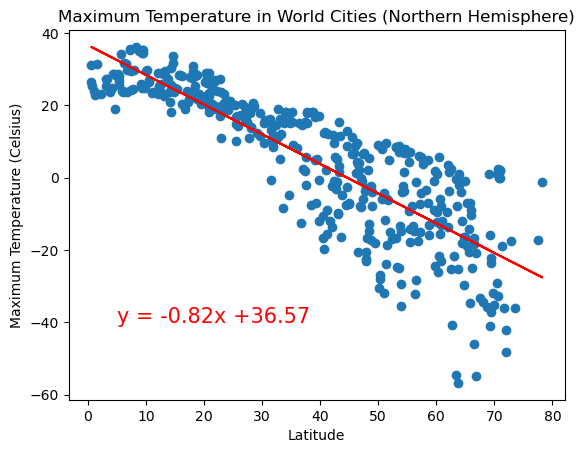

In [21]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values, color = "red")

# Label plot and annotate the line equation
plt.title("Maximum Temperature in World Cities (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Celsius)')
plt.annotate(line_eq,(5,-40),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.3349682585923595


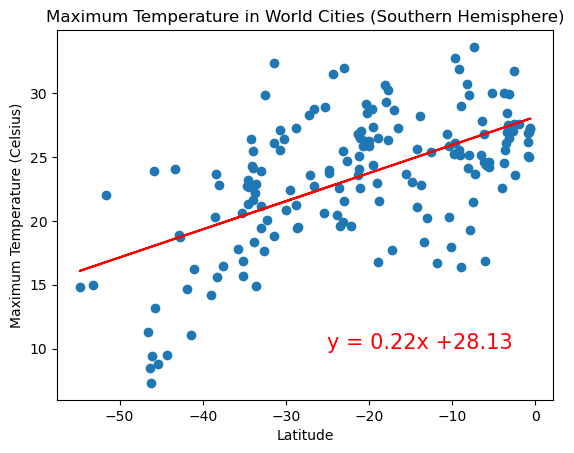

In [22]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values, color = "red")

# Label plot and annotate the line equation
plt.title("Maximum Temperature in World Cities (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Celsius)')
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
For both hemipheres, the further a city is from the equator, the colder the Maximum Temperature is.
In the northern hemisphere, this means the higher the latitude, the colder the maximum temperature.
In the sourthern hemiphere, this means the lower the latitude, the colder the maximum temperature.
For the current data, the r-values indicate the northern hemisphere regression equation is a good fit for the data, but the southern is not.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2470807472919432


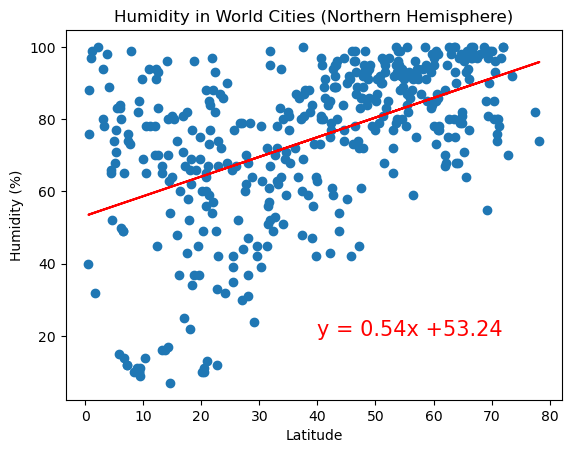

In [23]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values, color = "red")

# Label plot and annotate the line equation
plt.title("Humidity in World Cities (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.022242756821010446


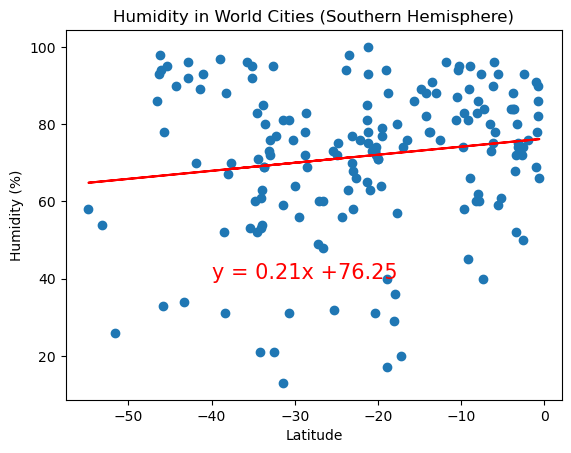

In [29]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values, color = "red")

# Label plot and annotate the line equation
plt.title("Humidity in World Cities (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** A linear relationship between humidity and latitude is not a good fit for either hemisphere. There appears to be a slight rise in humidity as latitude increases, but the r-values is too low to have confidence in this relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11427650256080366


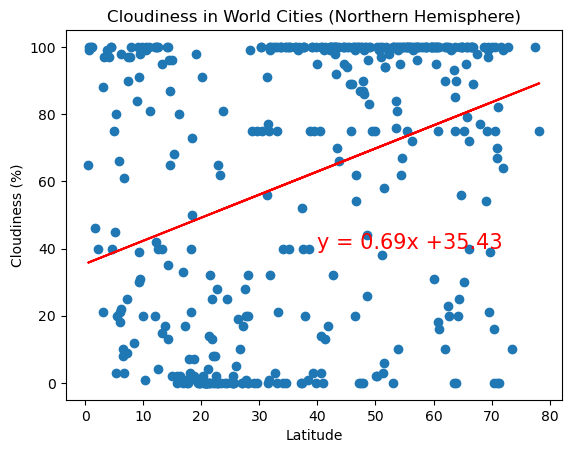

In [28]:
# Northern Hemisphere
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values, color = "red")

# Label plot and annotate the line equation
plt.title("Cloudiness in World Cities (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.20219798504489442


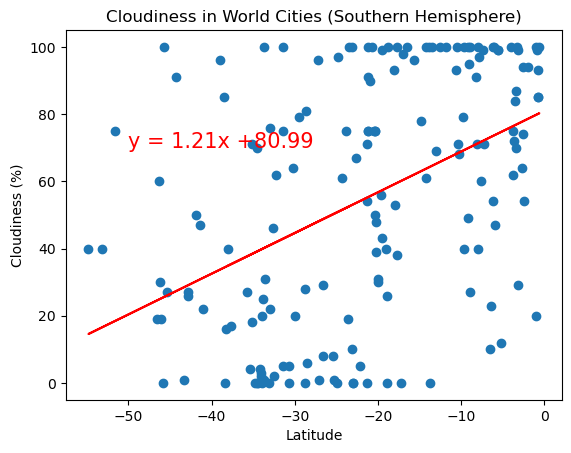

In [27]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values, color = "red")

# Label plot and annotate the line equation
plt.title("Cloudiness in World Cities (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** A linear relationship between humidity and latitude is not a good fit for either hemisphere. The r-values are too low to have confidence in this relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.021469613567772064


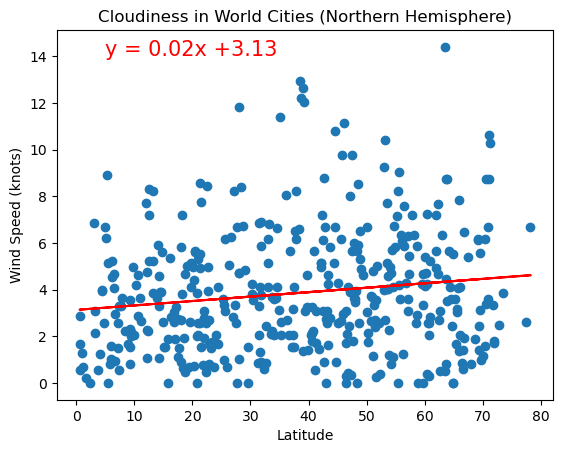

In [32]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values, color = "red")

# Label plot and annotate the line equation
plt.title("Cloudiness in World Cities (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (knots)')
plt.annotate(line_eq,(5,14),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.05322881906243813


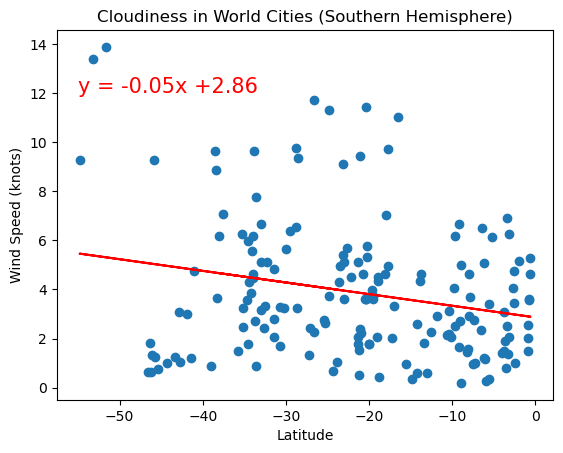

In [35]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values, color = "red")

# Label plot and annotate the line equation
plt.title("Cloudiness in World Cities (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (knots)')
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** A linear relationship between wind speed and latitude is not a good fit for either hemisphere. There appears to be a slight rise in wind speed the further a city is from the equator, but the r-values is too low to have confidence in this relationship.